In [133]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from autocorrect import Speller
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [134]:
data = pd.read_csv('spam.csv')

In [135]:
data = data[['v1','v2']]

In [136]:
data.rename(columns = {'v1':'labels', 'v2':'email'}, inplace = True)

## Let's look at the distribution of words for each email type.

### Spam emails

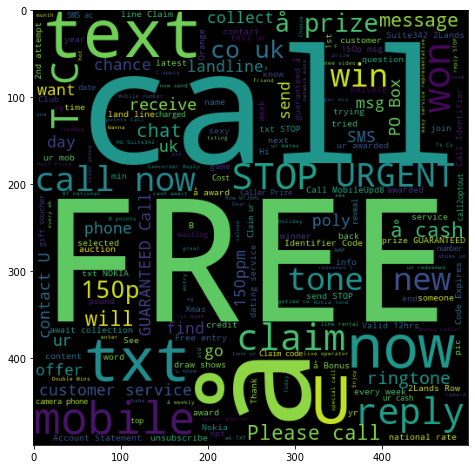

In [137]:
spam_words = ' '.join(list(data[data['labels'] == 'spam']['email']))
#This will allow us to visualize the most common words that happear in a spam email.
spam_wc = WordCloud(width=500, height = 500).generate(spam_words)
plt.figure(figsize = (10,8))
plt.imshow(spam_wc)
plt.show()

### Ham emails

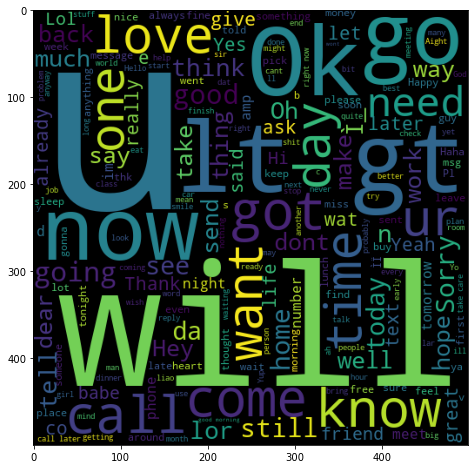

In [138]:
spam_words = ' '.join(list(data[data['labels'] == 'ham']['email']))
#This will allow us to visualize the most common words that happear in a spam email.
spam_wc = WordCloud(width=500, height = 500).generate(spam_words)
plt.figure(figsize = (10,8))
plt.imshow(spam_wc)
plt.show()

In [139]:
data.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

# Preprocessing the data

- Remove characters that are not letters
- apply .lower() to every word
- tokenization
- remove the stop words
- stemming 
- Correct the spelling

Removing non common characters. 

In [140]:
data.email = data.email.apply(lambda x: re.sub('[^A-Za-z]',' ', x))

Apply .lower()

In [141]:
data.email = data.email.str.lower()

Tokenization

In [142]:
data.email = data.email.apply(lambda x: word_tokenize(x))

Removing stop words, correct spelling and stemming

In [143]:
spell_correcter = Speller()
stemmer  = PorterStemmer()
list_of_emails = []
for row in tqdm(data.email):
    lst = []
    for word in row:
        #remove the words that are stopwords
        if word not in stopwords.words('english'):
            #corrects the spelling
            corrected_word = spell_correcter(word)
            #stems each word
            word_stemm = stemmer.stem(corrected_word)
            #makes a new sentence without the stop words, with the word stemmed and without spelling errors
            lst.append(word_stemm)
    #appends to the big list
    list_of_emails.append(lst)

 14%|█▎        | 760/5572 [01:08<03:33, 22.54it/s]

In [ ]:
new_lst = []
for i in list_of_emails:
    sentence = ' '.join(i)
    new_lst.append(sentence)


Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_lst, data.labels, test_size=0.25)

Vectorize the emails

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()

In [ ]:
x_train = counter.fit_transform(x_train).toarray()
x_test = counter.transform(x_test).toarray()


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, model.predict(x_test)))
print('Accuracy:\n', accuracy_score(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.96      0.75      0.84       189
        spam       0.79      0.97      0.87       185

    accuracy                           0.86       374
   macro avg       0.87      0.86      0.85       374
weighted avg       0.87      0.86      0.85       374

Accuracy:
 0.8556149732620321
